In [11]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *
from IPython.display import Image

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

path_data = '/Users/ychen/Documents/projects/research/textbook/assets/data/'


In [2]:
actors = Table.read_table(path_data + 'actors.csv')
actors


Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


- Scatter plots

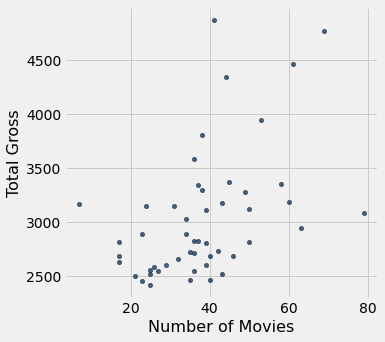

In [3]:
actors.scatter('Number of Movies', 'Total Gross')


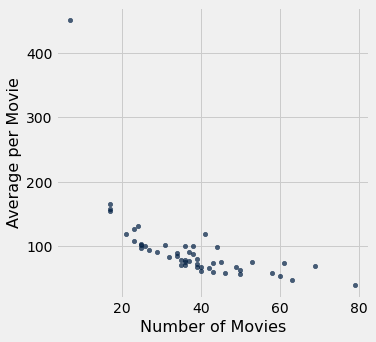

In [4]:
actors.scatter('Number of Movies', 'Average per Movie')


- For the right end, let’s zoom in on the main body of the plot by just looking at the portion that doesn’t have the outlier.

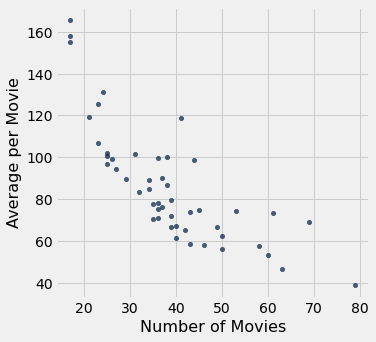

In [5]:
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')


In [6]:
actors.where('Number of Movies', are.above(60))


Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


- Lower end outliers.

In [7]:
actors.where('Number of Movies', are.below(10))


Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


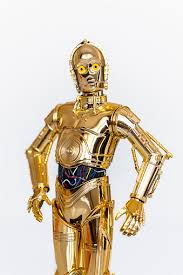

In [12]:
Image(filename='C-3PO.jpeg')


- Line plots

In [13]:
movies_by_year = Table.read_table(path_data + 'movies_by_year.csv')
movies_by_year


Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


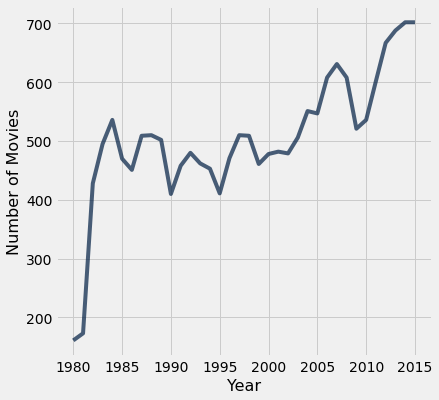

In [14]:
movies_by_year.plot('Year', 'Number of Movies')


In [15]:
century_21 = movies_by_year.where('Year', are.above(1999))


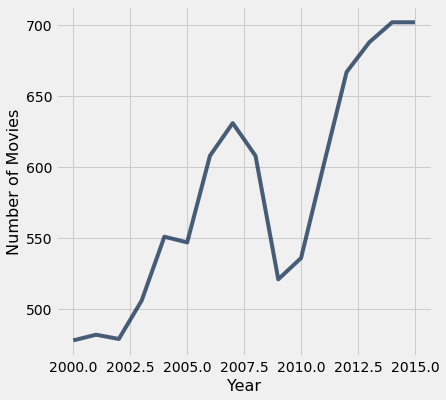

In [16]:
century_21.plot('Year', 'Number of Movies')


- The dollar figures, however, didn’t suffer much.


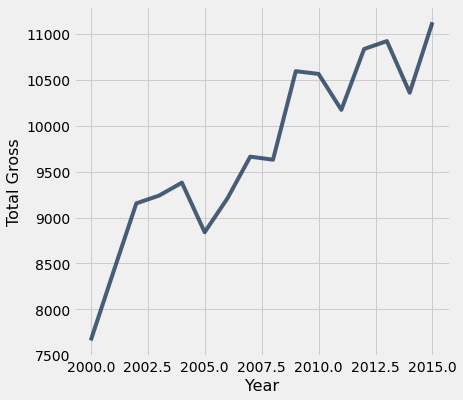

In [17]:
century_21.plot('Year', 'Total Gross')


In [18]:
century_21.where('Year', are.equal_to(2009))


Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar


# Categorical distributions

In [19]:
icecream = Table().with_columns(
    'Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
    'Number of Cartons', make_array(16, 5, 9)
)
icecream


Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


- Bar Chart

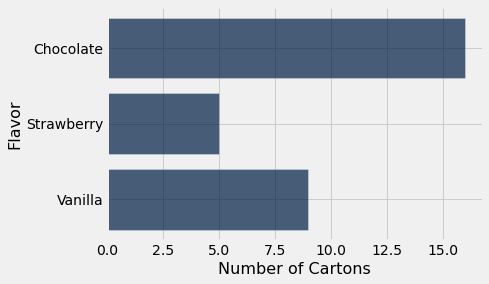

In [20]:
icecream.barh('Flavor', 'Number of Cartons')


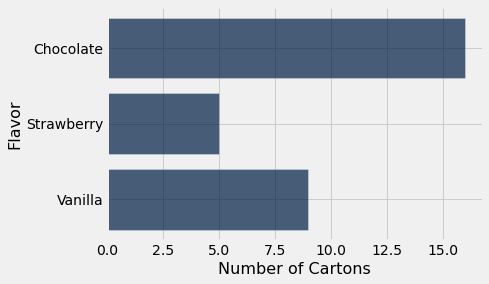

In [21]:
icecream.barh('Flavor')


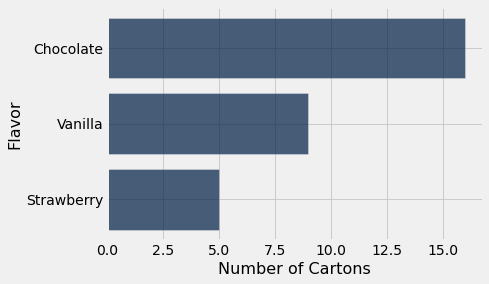

In [22]:
icecream.sort('Number of Cartons', descending=True).barh('Flavor')


- Grouping Categorical Data

In [23]:
top = Table.read_table(path_data + 'top_movies_2017.csv')
top


Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [24]:
movies_and_studios = top.select('Title', 'Studio')


In [25]:
studio_distribution = movies_and_studios.group('Studio')
studio_distribution


Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [26]:
sum(studio_distribution.column('count'))


200

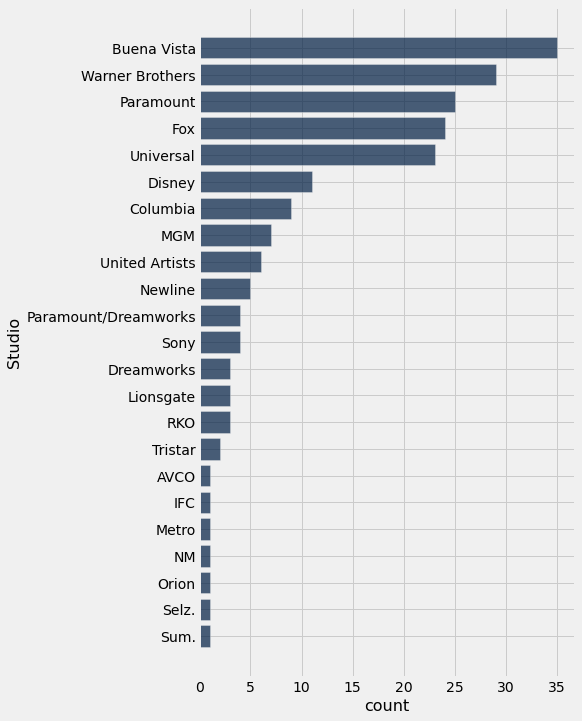

In [27]:
studio_distribution.sort('count', descending=True).barh('Studio')


- Let’s do that and just look at the 10 earliest years in the distribution.


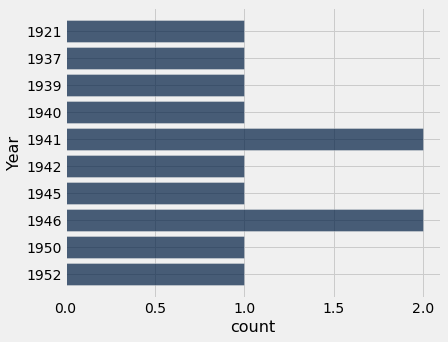

In [28]:
movies_and_years = top.select('Title', 'Year')
movies_and_years.group('Year').take(np.arange(10)).barh('Year')


# Numerical Distributions

In [29]:
top = Table.read_table(path_data + 'top_movies_2017.csv')
# Make the numbers in the Gross and Gross (Adjusted) columns look nicer:
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
Star Wars,Fox,"460,998,007","1,583,483,200",1977
The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
Titanic,Paramount,"658,672,302","1,204,368,000",1997
The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
Jaws,Universal,"260,000,000","1,138,620,700",1975
Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In [30]:
millions = top.select(0).with_columns('Adjusted Gross', 
                                     np.round(top.column(3)/1e6, 2))
millions


Title,Adjusted Gross
Gone with the Wind,1796.18
Star Wars,1583.48
The Sound of Music,1266.07
E.T.: The Extra-Terrestrial,1261.08
Titanic,1204.37
The Ten Commandments,1164.59
Jaws,1138.62
Doctor Zhivago,1103.56
The Exorcist,983.23
Snow White and the Seven Dwarves,969.01


- Binning the Data

In [31]:
adj_gross = millions.column('Adjusted Gross')
min(adj_gross), max(adj_gross)


(338.41, 1796.18)

In [32]:
bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300,2001,100))
bin_counts.show()


bin,Adjusted Gross count
300,68
400,60
500,32
600,15
700,7
800,7
900,3
1000,0
1100,3
1200,3


- By the usual Python convention, each bin except the last includes its left endpoint but not its right endpoint.
- If you don’t specify any bins, the default is to produce 10 equally wide bins between the minimum and maximum values of the data.

In [33]:
millions.bin('Adjusted Gross').show()


bin,Adjusted Gross count
338.41,115
484.187,50
629.964,14
775.741,10
921.518,3
1067.3,4
1213.07,2
1358.85,0
1504.63,1
1650.4,1


In [34]:
millions.bin('Adjusted Gross', bins=4)


bin,Adjusted Gross count
338.41,177
702.852,15
1067.3,6
1431.74,2
1796.18,0


Histogram
- For now, just note that the vertical axis does not represent percents.

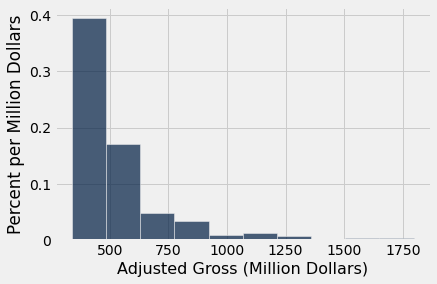

In [35]:
millions.hist('Adjusted Gross', unit="Million Dollars")


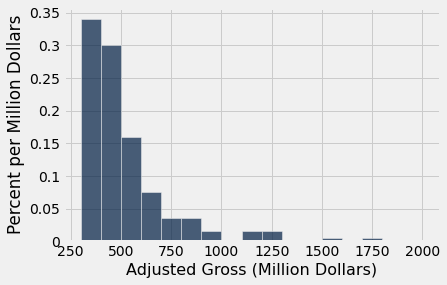

In [36]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), unit="Million Dollars")


Histograms follow the area principle and have two defining properties:
- The bins are drawn to scale and are contiguous (though some might be empty), because the values on the horizontal axis are numerical and therefore have fixed positions on the number line.
- The area of each bar is proportional to the number of entries in the bin.

When drawn using this method, the histogram is said to be drawn on the density scale. On this scale:
- The area of each bar is equal to the percent of data values that are in the corresponding bin.
- The total area of all the bars in the histogram is 100%. In terms of proportions, we can say that the areas of all the bars in a histogram “sum to 1”

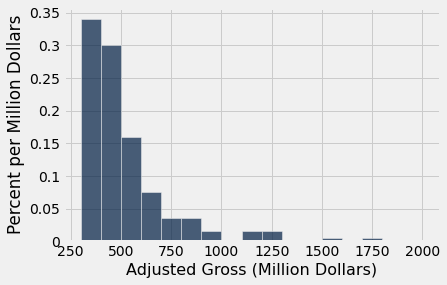

In [37]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), unit="Million Dollars")


In [38]:
bin_counts.show(3)


bin,Adjusted Gross count
300,68
400,60
500,32


# Why Not Simply Plot the Counts?
The main reason for plotting density on the vertical axis instead of counts or percents is to be able to compare histograms and approximate them with smooth curves where proportions are represented by areas under the curve.


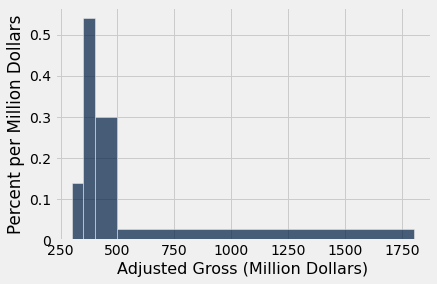

In [39]:
uneven = make_array(300, 350, 400, 500, 1800)
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")


- Notice that the [400, 500) bar has the same height (0.3% per million dollars) as in the histograms above.

# Overlaid Graphs

In [40]:
sons_heights = Table.read_table(path_data + 'sons_heights.csv')
sons_heights


father,mother,son
78.5,67,73.2
75.5,66.5,73.5
75,64,71
75,64,70.5
75,58.5,72
74,68,76.5
74,62,74
73,67,71
73,67,68
73,66.5,71


- Each point represents a row of the table, that is, a “father, mother, son” trio.

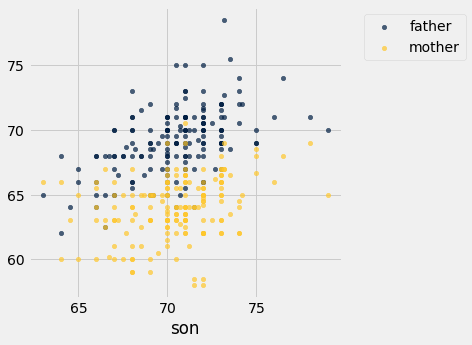

In [41]:
sons_heights.scatter('son')


- Overlaid Line Plots


In [42]:
# Read the full Census table
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'
full_census_table = Table.read_table(data)

# Select columns from the full table and relabel some of them
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
us_pop = partial_census_table.relabeled('POPESTIMATE2014', '2014').relabeled('POPESTIMATE2019', '2019')

# Access the rows corresponding to all children, ages 0-18
children = us_pop.where('SEX', are.equal_to(0)).where('AGE', are.below(19)).drop('SEX')
children.show()


AGE,2014,2019
0,3954787,3783052
1,3948891,3829599
2,3958711,3922044
3,4005928,3998665
4,4004032,4043323
5,4004576,4028281
6,4133372,4017227
7,4152666,4022319
8,4118349,4066194
9,4106068,4061874


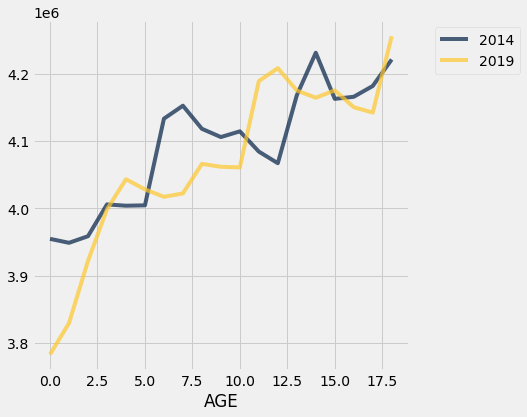

In [43]:
children.plot('AGE')


- Bar Charts

In [44]:
usa_ca = Table.read_table(path_data + 'usa_ca_2019.csv')
usa_ca


Ethnicity/Race,USA All,CA All,USA Children,CA Children
API,5.8,15.1,4.9,11.5
Black,12.2,5.3,13.4,4.9
Hispanic,18.5,39.5,25.6,52.1
White,60.1,36.4,50,25.5
Other,3.4,3.7,6.1,6


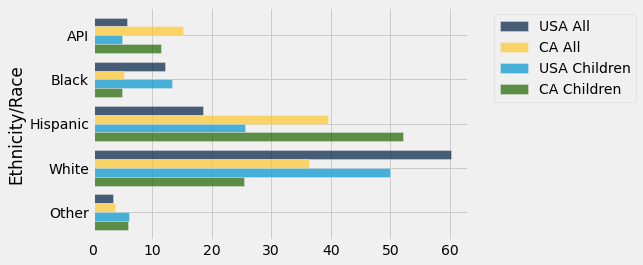

In [45]:
usa_ca.barh('Ethnicity/Race')


- Let’s start by comparing the entire populations of the U.S.A. and California.


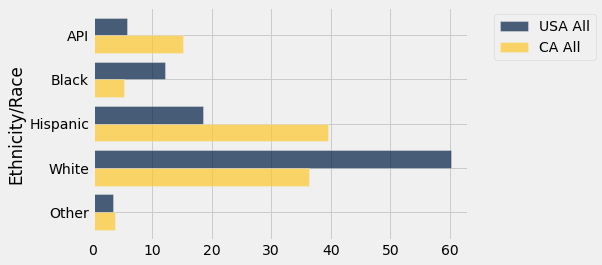

In [46]:
usa_ca.select('Ethnicity/Race', 'USA All', 'CA All').barh('Ethnicity/Race')


- As you can see from the graph, almost 40% of the Californian population in 2019 was Hispanic.
- Among Californian children in 2019, more than 50% were in the Hispanic category.

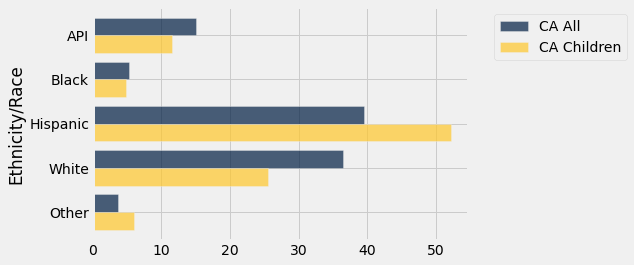

In [47]:
usa_ca.select('Ethnicity/Race', 'CA All', 'CA Children').barh('Ethnicity/Race')
